<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Umap and Umap plot

In [ ]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

     |████████████████████████████████| 1.6MB 8.8MB/s 
     |████████████████████████████████| 15.5MB 297kB/s 
     |████████████████████████████████| 81kB 7.6MB/s 
     |████████████████████████████████| 92kB 9.7MB/s 
     |████████████████████████████████| 665kB 40.1MB/s 
     |████████████████████████████████| 102kB 9.1MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-cp36-none-any.whl size=59430 sha256=fddcbff6e01fbdab7b255233a3e02d2ca759f542e2667b341ea31615476c30c8
  Stored in directory: /root/.cache/pip/wheels/8d/06/05/c1cba3d57bdcfd3960e3f60a9fdc97e4baef2ef09af0ad1ef8
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=78852391a95226f16f23ac8e3da805e2ae9cedf654206ec1c62ef409ddd1539e
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
  Created wheel for locket: filename=locket-0.2.0-cp36-none-any.whl size=4040 sha256=2dbb6aad098f176a24d452d2f5e63c4325437e0f44c51724fdb01fb9

# import all needed packages

In [10]:
import sklearn.datasets
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import pandas as pd
import umap
import umap.plot

#mnist = sklearn.datasets.fetch_openml("mnist_784")

##Import my Data

In [ ]:
from pandas import read_csv
from pandas import DataFrame
import numpy as np

def load_data(filename):
  dataset = read_csv(filename, header=0);
  data = dataset.values;
  return data
def segment_data(signal, distance, overlap):
  i = 1;
  s = list()
  while int(i+distance)<len(signal):
    a = signal[int(i):int(i+distance)];
    #a = [x for x in t]
    #a = DataFrame.transpose(DataFrame(t))
    #a = np.split(a,int(distance-1)
    s.append(a)
    i = i + distance*overlap
    
  return np.asarray(s) # return a nd array
d = 110
data0 = load_data('drive/My Drive/Dataset/InvertPhaseLong2.csv')  
ppgl0 = segment_data(data0[70:17220,0],d,0.5)  #in-phase
ppgl1 = segment_data(data0[70:,1],d,0.5)  # in-phase 
ppgl2 = segment_data(data0[70:,2],d,0.5)  # invert-phase
ppgl3 = segment_data(data0[70:,3],d,0.5)  # in-phase

data2 = load_data('drive/My Drive/Dataset/longcunDB2.csv') 
ppg2 = segment_data(data2[70:,1],d,0.5)
ppg3 = segment_data(data2[70:,0],d,0.5) # Positive with noise

data3 = load_data('drive/My Drive/Dataset/sejanCun1.csv') 
ppgs0 = segment_data(data3[70:,0],d,0.5) # invert-phase
ppgs1 = segment_data(data3[70:,1],d,0.5) # noise
ppgs2 = segment_data(data3[1400:20200,2],d,0.5) # invert-phase
ppgs3 = segment_data(data3[70:,3],d,0.5) # noise

data4 = load_data('drive/My Drive/Dataset/longcunDB01.csv') 
ppgla0 = segment_data(data4[70:,0],d,0.5) # invert-phase
ppgla1 = segment_data(data4[70:,1],d,0.5) # noise
ppgla2 = segment_data(data4[70:,2],d,0.5) # invert-phase
ppgla3 = segment_data(data4[70:,3],d,0.5) # invert-phase

data5 = load_data('drive/My Drive/Dataset/InvertPhaseLong1.csv') 
ppglb0 = segment_data(data5[70:,0],d,0.5) # not good invert-phase
ppglb1 = segment_data(data5[70:,1],d,0.5) # in-phase
ppglb2 = segment_data(data5[70:,2],d,0.5) # invert-phase
ppglb3 = segment_data(data5[70:,3],d,0.5) # in-phase

data6 = load_data('drive/My Drive/Dataset/sejanCun2.csv') 
ppgsa0 = segment_data(data6[70:,0],d,0.5) # in-phase
ppgsa1 = segment_data(data6[70:,1],d,0.5) # noise
ppgsa2 = segment_data(data6[70:,2],d,0.5) # in-phase
ppgsa3 = segment_data(data6[70:,3],d,0.5) # noise

data7 = load_data('drive/My Drive/Dataset/sejanGuan2.csv') 
ppgsb0 = segment_data(data7[70:,0],d,0.5) # not good invert-phase
ppgsb1 = segment_data(data7[70:,1],d,0.5) # invert-phase
ppgsb2 = segment_data(data7[70:,2],d,0.5) # not good invert-phase
ppgsb3 = segment_data(data7[70:,3],d,0.5) # invert-phase

data8 = load_data('drive/My Drive/Dataset/dauChi01.csv') 
ppgd0 = segment_data(data8[70:,0],d,0.5) #  invert-phase
ppgd1 = segment_data(data8[70:,1],d,0.5) # NG invert-phase
ppgd2 = segment_data(data8[70:,2],d,0.5) #  invert-phase
ppgd3 = segment_data(data8[70:,3],d,0.5) # NG invert-phase

data9 = load_data('drive/My Drive/Dataset/dauGuan2.csv') 
ppgda0 = segment_data(data9[70:,0],d,0.5) #  in-phase
ppgda1 = segment_data(data9[70:,1],d,0.5) # noise -inphase
ppgda2 = segment_data(data9[70:,2],d,0.5) #  in-phase
ppgda3 = segment_data(data9[70:,3],d,0.5) # noise in-phase

data10 = load_data('drive/My Drive/Dataset/haiCun01.csv') 
ppgh0 = segment_data(data10[70:,0],d,0.5) #  in-phase
ppgh1 = segment_data(data10[70:,1],d,0.5) # noise -inphase
ppgh2 = segment_data(data10[70:,2],d,0.5) #  in-phase
ppgh3 = segment_data(data10[70:,3],d,0.5) # noise in-phase

data11 = load_data('drive/My Drive/Dataset/haiChi01.csv') 
ppgha0 = segment_data(data11[70:,0],d,0.5) #  noise
ppgha1 = segment_data(data11[70:,1],d,0.5) # noise 
ppgha2 = segment_data(data11[70:,2],d,0.5) #  noise 
ppgha3 = segment_data(data11[70:,3],d,0.5) # noise 

s1 = np.concatenate((ppgl0, ppgl1, ppgl3, ppglb1,ppglb3, ppgsa0, ppgsa2, ppgda0, ppgda2)) # in-phase
s2 = np.concatenate((ppgl2, ppgs0, ppgs2, ppgla0, ppgla2, ppgla3, ppglb2, ppgsb1, ppgsb3, ppgd0, ppgd2))  # invert-phase
s3 = np.concatenate((ppg2, ppgs1, ppgs3,ppgla1, ppgsa1, ppgsa3, ppgda1, ppgda3, ppgh0, ppgh1, ppgha0, ppgha1, ppgha2, ppgha3))           # noise Data

## Prepare Data

In [ ]:
# label for first group of Data
y1 = [1]*s1.shape[0];
y2 = [-1]*s2.shape[0];
y3 = [0]*s3.shape[0];

y1 = np.asarray(y1)
y2 = np.asarray(y2)
y3 = np.asarray(y3)
print((y1.shape, y2.shape, y3.shape))
#ydf1 = DataFrame(y1)
#ydf2 = DataFrame(y2)
# Concatenate data
X = np.concatenate((s1, s2, s3))
y = np.concatenate((y1, y2, y3))
print(X.shape)

# rescale data
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
def scaling(signal):
  scaler = MinMaxScaler()
  s_trans = signal.transpose()
  Xscaled = scaler.fit_transform(s_trans)
  Xscaled = Xscaled.transpose()
  return Xscaled  
Xscaled = scaling(X)
Xscaled2 = scaling(ppg2)
Xscaled3 = scaling(ppg3)

((3310,), (4114,), (5230,))
(12654, 110)


# Convert to Class

In [ ]:
# Convert to class 
y_df = DataFrame(y, columns=['Phase'])
y =y_df['Phase']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y_df, test_size=0.3, random_state=123)

In [ ]:
y_df.value_counts()

Phase
 0       5230
-1       4114
 1       3310
dtype: int64

## Mapping Data with UMAP

In [ ]:
mapper = umap.UMAP(random_state=79).fit_transform(Xscaled)

    

In [ ]:
import seaborn as sns
col_dict = {1:'#7bc90c',
            -1:'#ffb700',
            3:'#f5072f',
            4:'#d109e3',
            5: "#009dff",
            6: "#10ccb6",
            0: "#6484f5",
            8: "#ab0e3a",
            9: "#bd9e15",
            7: 'grey',
           }

class_set = y.unique()

pals = [col_dict[cl] for cl in class_set]     

 # List of RGB triplets
rgb_values = sns.color_palette(pals, 10)  

# Map label to RGB
color_map = dict(zip(class_set, rgb_values))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


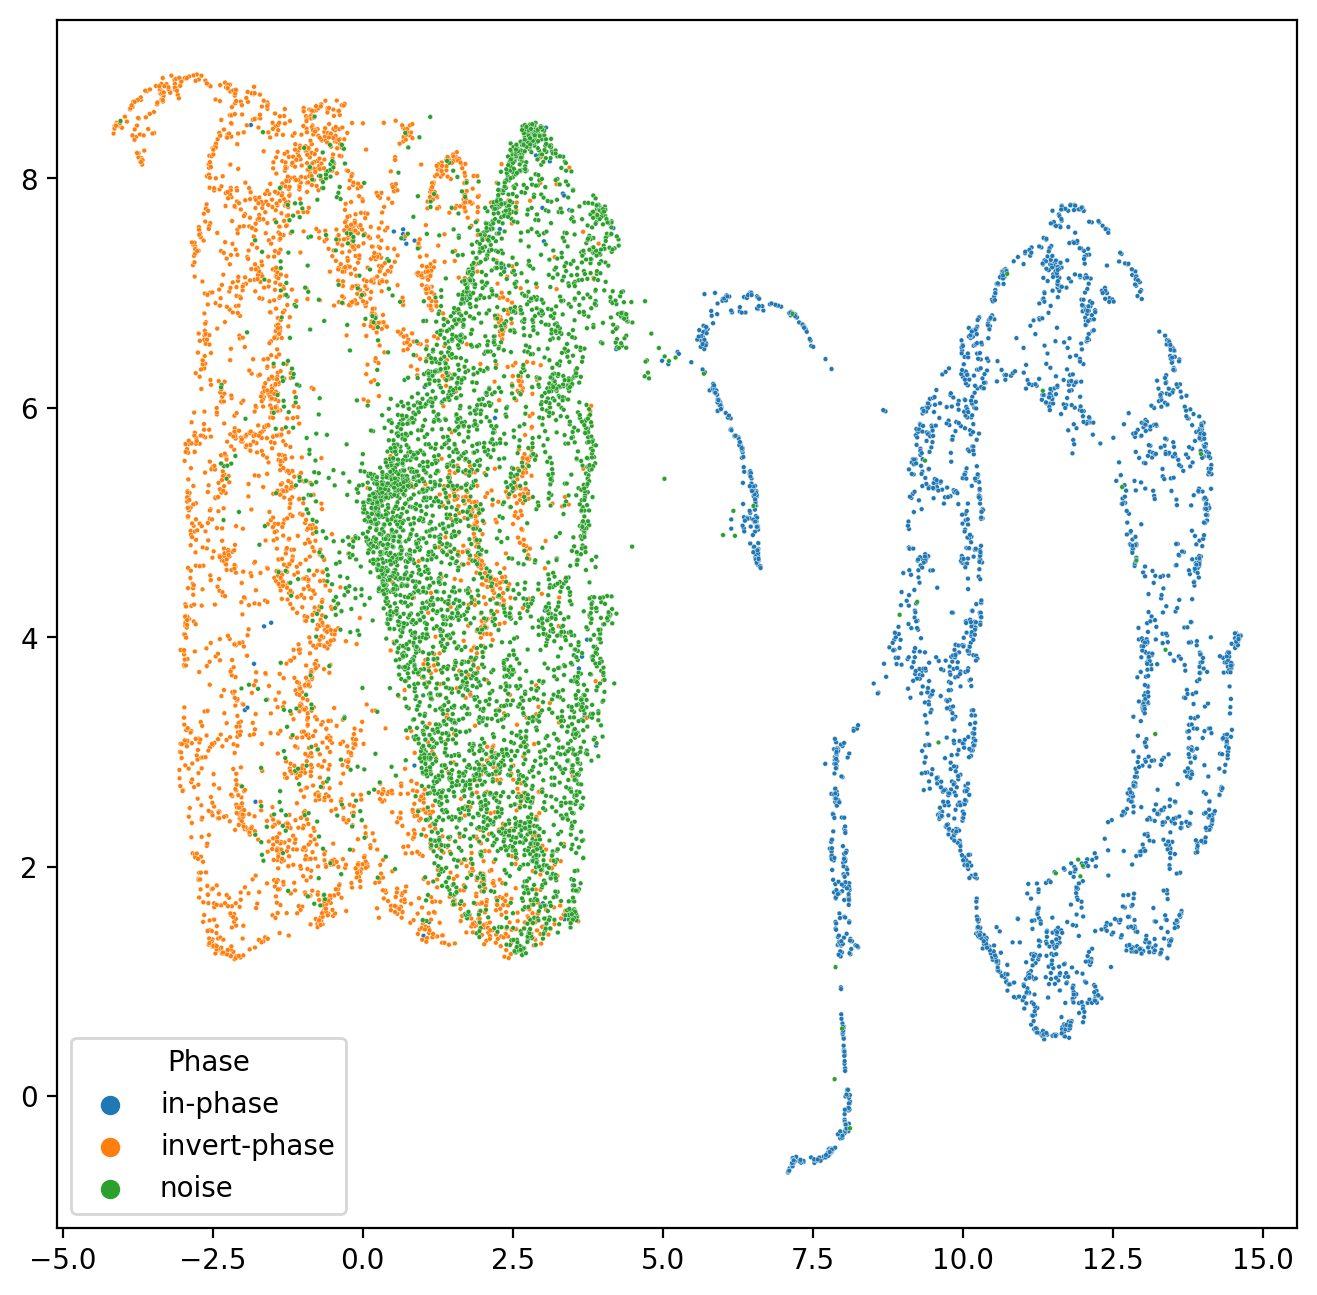

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8), dpi = 200)

sns.scatterplot(mapper[:,0],mapper[:,1], 
                hue = y.map({
        0:'noise',
        1:'in-phase',
        -1:'invert-phase',
    }), 
                s=3,
               cmap = "Blue")

In [ ]:

p = umap.plot.interactive(mapper,labels = y,  hover_data=hover_data,point_size=2)
umap.plot.show(p)

In [ ]:
plt.figure(figsize=(8,8), dpi = 200)

plt.scatter(mapper[:,0],
            mapper[:,1], 
            c=y.map(color_map), 
            alpha = 0.9, 
            s=5)

NameError: ignored

In [ ]:
umap.plot.points(mapper, labels=y, width=1000, height=1000,  theme="red",color_key="RGB",)


ValueError: ignored

In [ ]:
y_df.value_counts()

 1    589
 0    589
-1    589
dtype: int64

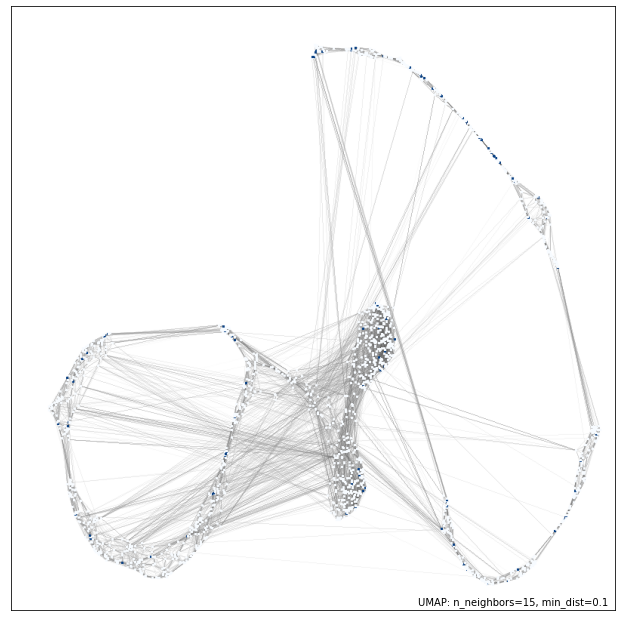

In [ ]:
umap.plot.connectivity(mapper, show_points=True)

/usr/local/lib/python3.6/dist-packages/umap/plot.py:850: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  "Hammer edge bundling is expensive for large graphs!\n"


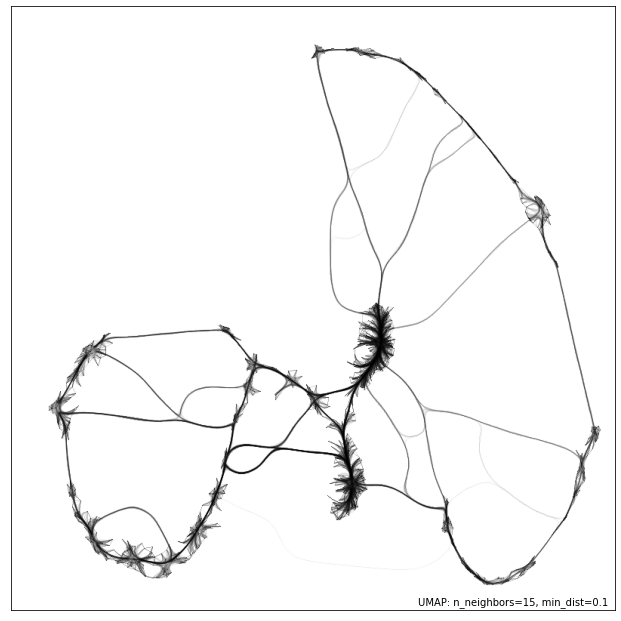

In [ ]:
umap.plot.connectivity(mapper, edge_bundling='hammer')

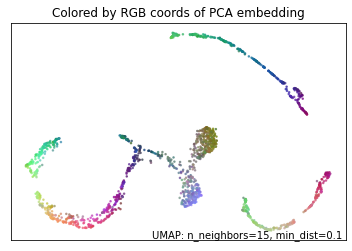

In [ ]:
umap.plot.diagnostic(mapper, diagnostic_type='pca')

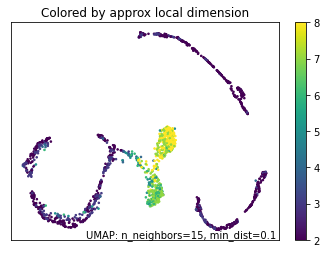

In [ ]:
local_dims = umap.plot.diagnostic(mapper, diagnostic_type='local_dim')